# Исследование объявлений о продаже квартир

Используя данные сервиса Яндекс.Недвижимость, определить рыночную стоимость объектов недвижимости и типичные параметры квартир.

### Описание

На основе данных сервиса Яндекс.Недвижимость определена рыночная стоимость
объектов недвижимости разного типа, типичные параметры квартир, в зависимости от
удаленности от центра. Проведена предобработка данных. Добавлены новые данные.
Построены гистограммы, боксплоты, диаграммы рассеивания.

**Цель исследования:**

Выяснить какие факторы в большей степени влияют на стоимость квартры.

### Данное исследование разделим на несколько частей:

* [ Откройте файл с данными и изучите общую информацию](#1-section)
* [Предобработка данных](#2-section)
* [Посчитаем и добавим в таблицу новые столбцы](#3-section)
* [Проведем исследовательсикй анализ](#4-section)
* [Общий вывод по проекту.](#5-section)

<a id='1-section'></a>
# Открываем файл с данными и изучаем общую информацию

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('C:/Users/Гоша/OneDrive/Рабочий стол/DS/datasets/real_estate_data.csv', sep='\t')

In [3]:
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

Расшифровка столбцов

- airports_nearest — расстояние до ближайшего аэропорта в метрах(м)
- balcony — число балконов
- ceiling_height — высота потолков(м)
- cityCenters_nearest — расстояние до центра города(м)
- days_exposition — сколько дней было размещено объявление(от публикации до снятия)
- first_day_exposition — дата публикации
- floor — этаж
- floors_total — всего этажей в доме
- is_apartment — апартаменты(булев тип)
- kitchen_area — площадь кухни в квадратных метрах(м²)
- last_price — цена на момент снятия с публикации
- living_area — жилая площадь в квадратных метрах(м²)
- locality_name — название населённого пункта
- open_plan — свободная планировка(булев тип)
- parks_around3000 — число парков в радиусе 3 км
- parks_nearest — расстояние до ближайшего парка(м)
- ponds_around3000 — число водоёмов в радиусе 3 км
- ponds_nearest — расстояние до ближайшего водоёма(м)
- rooms — число комнатstudio — квартира-студия(булев тип)
- total_area — площадь квартиры в квадратных метрах(м²)
- total_images — число фотографий квартиры в объявлении

In [5]:
df.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


In [6]:
df.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

In [7]:
df.duplicated().sum()

0

array([[<AxesSubplot:title={'center':'total_images'}>,
        <AxesSubplot:title={'center':'last_price'}>,
        <AxesSubplot:title={'center':'total_area'}>,
        <AxesSubplot:title={'center':'rooms'}>],
       [<AxesSubplot:title={'center':'ceiling_height'}>,
        <AxesSubplot:title={'center':'floors_total'}>,
        <AxesSubplot:title={'center':'living_area'}>,
        <AxesSubplot:title={'center':'floor'}>],
       [<AxesSubplot:title={'center':'kitchen_area'}>,
        <AxesSubplot:title={'center':'balcony'}>,
        <AxesSubplot:title={'center':'airports_nearest'}>,
        <AxesSubplot:title={'center':'cityCenters_nearest'}>],
       [<AxesSubplot:title={'center':'parks_around3000'}>,
        <AxesSubplot:title={'center':'parks_nearest'}>,
        <AxesSubplot:title={'center':'ponds_around3000'}>,
        <AxesSubplot:title={'center':'ponds_nearest'}>],
       [<AxesSubplot:title={'center':'days_exposition'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], d

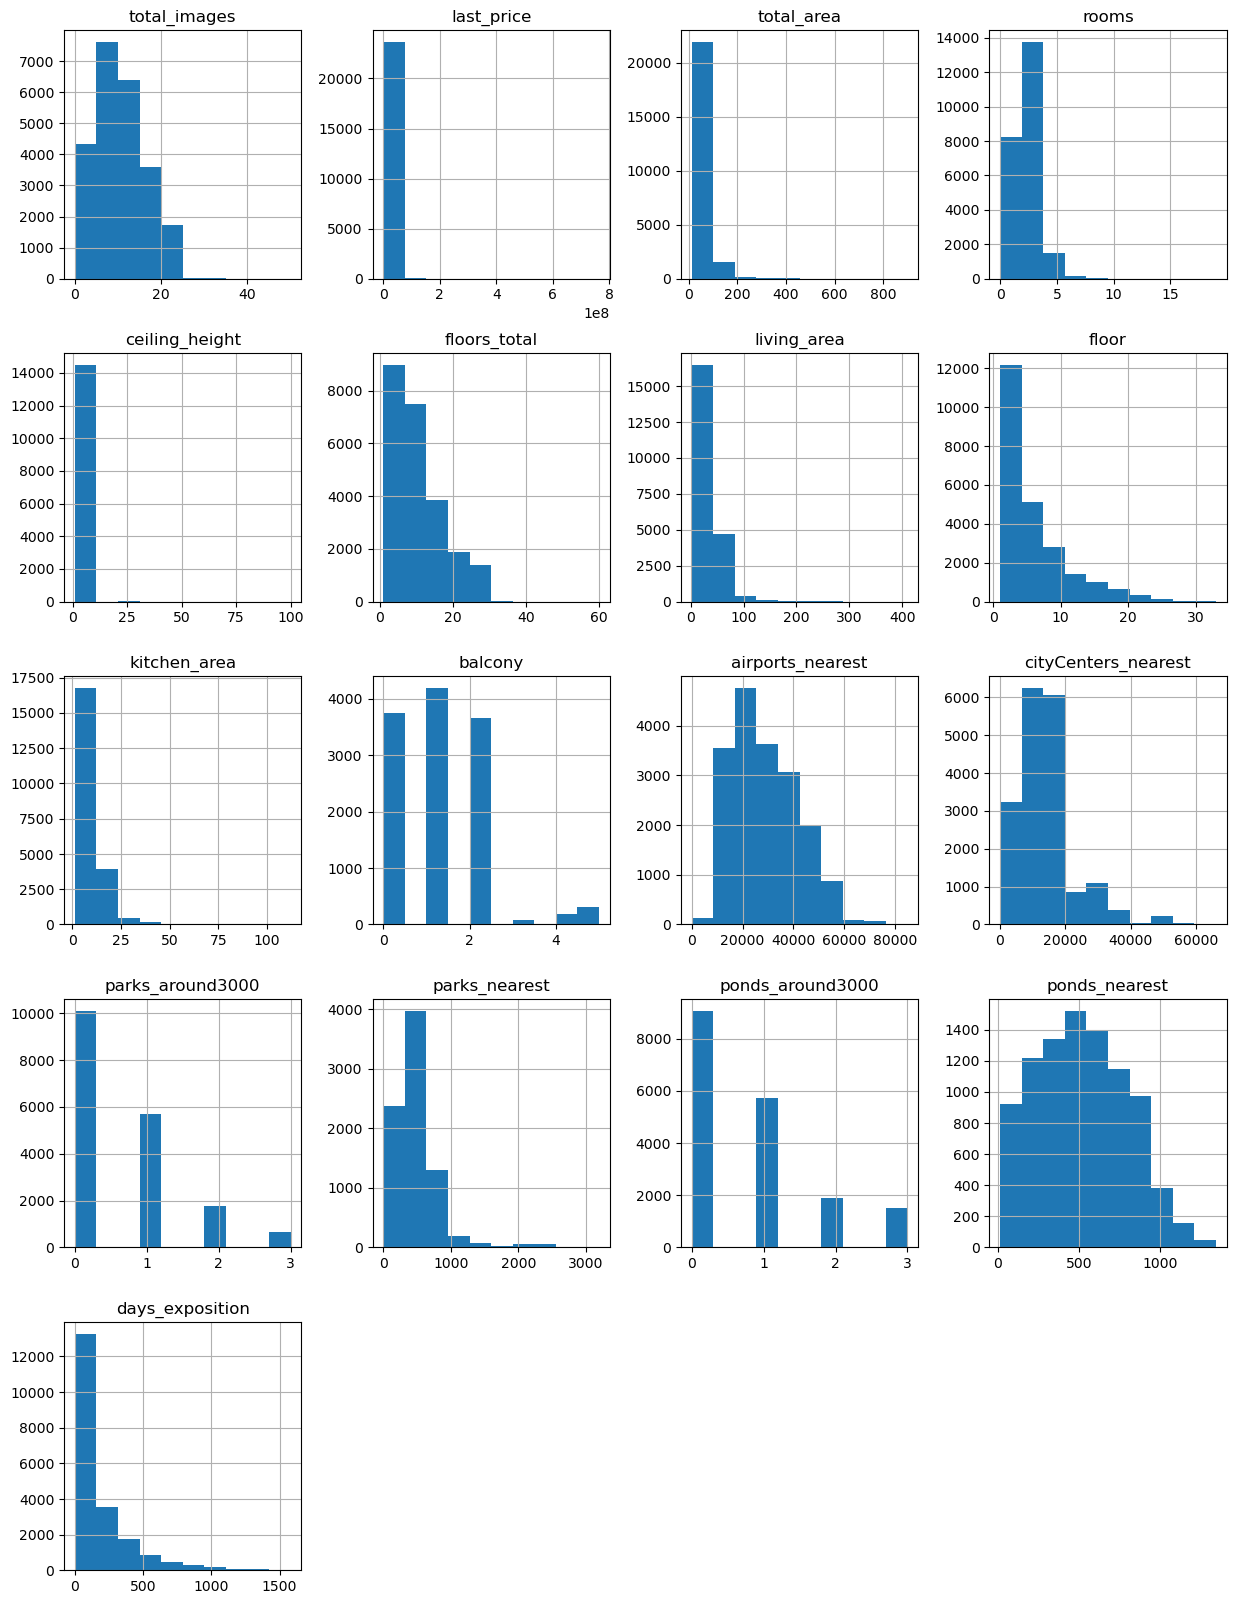

In [8]:
df.hist(figsize=(15,20))

**Выводы:**
- У некоторых столбцов неправильный тип данных, к примеру столбец `is_apartment` должен содержать значения типа `bool`.
-  В датасете присутсвует довольно много пропусков.
- Столбец `cityCenters_nearest` не имеет вида snake_case.
- Наблюдаются аномальные данные.
- Стобец даты необходимо привести в привычный тип.

# Предобработка данных.<a id='1-section'></a>

Переименуем столбец `cityCenters_nearest` в `city_сenters_nearest`.

In [9]:
df.rename(columns={'cityCenters_nearest':'city_centers_nearest'}, inplace=True)

Приведем данные в столбце `first_day_exposition` к стандартному виду.

In [10]:
df['first_day_exposition'] =pd.to_datetime(df['first_day_exposition'])
display(df['first_day_exposition'].head())

0   2019-03-07
1   2018-12-04
2   2015-08-20
3   2015-07-24
4   2018-06-19
Name: first_day_exposition, dtype: datetime64[ns]

Переименуем столбец `parks_around3000` на `parks_around` и столбец `ponds_around3000` на `ponds_around`.

In [11]:
df.rename(columns = {'parks_around3000':'parks_around', 'ponds_around3000':'ponds_around'}, inplace=True)

**Исследуем столбец `rooms`.**

В датасете имеются квартиры без комнат, проведем подсчет таких квартир и изучим их положение в таблице.

In [12]:
df.query('rooms==0')['rooms'].count()

197

In [13]:
df.query('rooms==0').head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around,parks_nearest,ponds_around,ponds_nearest,days_exposition
144,1,2450000.0,27.00,2017-03-30,0,NaN,24.0,15.50,2,NaN,...,NaN,2.0,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,181.0
349,4,2320000.0,25.00,2017-09-27,0,NaN,14.0,17.00,1,NaN,...,NaN,0.0,деревня Кудрово,NaN,NaN,NaN,NaN,NaN,NaN,45.0
440,8,2480000.0,27.11,2018-03-12,0,NaN,17.0,24.75,4,NaN,...,NaN,2.0,Санкт-Петербург,38171.0,15015.0,0.0,NaN,2.0,982.0,64.0
508,0,3375000.0,34.40,2017-03-28,0,NaN,26.0,24.30,19,NaN,...,NaN,1.0,посёлок Парголово,53115.0,19292.0,0.0,NaN,1.0,593.0,430.0
608,2,1850000.0,25.00,2019-02-20,0,NaN,10.0,NaN,7,NaN,...,NaN,NaN,посёлок Шушары,NaN,NaN,NaN,NaN,NaN,NaN,29.0


Площадь таких квартир довольно небольшая и отсутвсуют кухни, следовательно можно сделать вывод о том, что это студии. В этом случае оставим данные без изменения.

**Исследуем столбец `ceiling_height`**

Потолки от 1 до 100 метра выглядит довольно не правдоподобно. Необходимо ограничить выборку. Минимальное значение высоты потолков для обычных квартир начинается с 2,5 метров, для элитных квартир 
данный показатель может доходить до 4 метров.
(https://spb.101novostroyka.ru/info/standartnaya-vysota-potolkov-normativy/)

In [14]:
df.query('ceiling_height > 2.5 and ceiling_height < 4')['ceiling_height'].mean()

2.7906933901128874

In [15]:
df.loc[df['ceiling_height'] < 2, 'ceiling_height'] == 2.79
df.loc[df['ceiling_height'] > 4, 'ceiling_height'] == 2.79

154      False
355      False
464      False
1026     False
1053     False
         ...  
22309    False
22336    False
22494    False
22869    False
22938    False
Name: ceiling_height, Length: 75, dtype: bool

В этом столбце также присутствуют пропуски заполним их средним значением.

In [16]:
df['ceiling_height'] = df['ceiling_height'].fillna(2.79)

**Исследуем столбец `floors_total`**

Пропуски в столбце `floors_total` мы никак не сможем заполнить, так как их небольшое количество мы можем смело их отбросить.

In [17]:
df.dropna(subset=['floors_total'], inplace=True)

**Исследуем столбец `living_area`**

In [18]:
df['living_area'].describe()

count    21743.000000
mean        34.462781
std         22.037433
min          2.000000
25%         18.600000
50%         30.000000
75%         42.300000
max        409.700000
Name: living_area, dtype: float64

Жилая площадь в 2 квадратных метра выглядит аномально, посматрим на данные.

In [19]:
df.loc[df['living_area'] < 5].head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around,parks_nearest,ponds_around,ponds_nearest,days_exposition
3242,7,4440000.0,41.0,2017-07-02,1,2.79,17.0,3.0,17,NaN,...,11.0,NaN,Санкт-Петербург,19272.0,13073.0,0.0,NaN,0.0,NaN,216.0
13915,20,6350000.0,52.0,2018-02-06,2,3.00,6.0,2.0,2,NaN,...,9.0,NaN,Санкт-Петербург,32453.0,6521.0,0.0,NaN,1.0,1012.0,91.0
21758,0,2330000.0,23.0,2018-01-01,0,2.79,24.0,2.0,22,NaN,...,NaN,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,66.0
23574,14,64990000.0,139.0,2015-11-24,3,3.00,8.0,3.0,8,NaN,...,16.0,1.0,Санкт-Петербург,33255.0,5975.0,1.0,630.0,3.0,100.0,280.0


Так как общая площадь таких квартир выглядит приемлимо, то оставим данные без изменений. А пропуски заполним медианным значением.

In [20]:
meadian_living_area = df['living_area'].mean()

In [21]:
df['living_area'] = df['living_area'].fillna(meadian_living_area)

**Исследуем столбец `is_apartment`**

In [22]:
df.loc[df['is_apartment'].isna()].head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around,parks_nearest,ponds_around,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07,3,2.70,16.0,51.000000,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04,1,2.79,11.0,18.600000,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20,2,2.79,5.0,34.300000,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24,3,2.79,14.0,34.462781,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19,2,3.03,14.0,32.000000,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


Заполним пропуски в этом столбце на `False`.

In [23]:
df['is_apartment'] = df['is_apartment'].fillna(False).astype('bool')

**Заполним пропуски в столбце `kitchen_area` на медианное значение.**

In [24]:
kitchen_median = df['kitchen_area'].median()
print(kitchen_median)

9.1


In [25]:
df['kitchen_area'] = df['kitchen_area'].fillna(kitchen_median)

In [26]:
df.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area                 0
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area                0
balcony                 11480
locality_name              48
airports_nearest         5532
city_centers_nearest     5509
parks_around             5508
parks_nearest           15568
ponds_around             5508
ponds_nearest           14552
days_exposition          3172
dtype: int64

**Исследуем столбец `balcony`.**

При отстутствии балкона человек скорее всего не будет заполнять этот столбце. Следовательнно, заполним пропуски в колонке `balcony` на `0`.

In [27]:
df['balcony'] = df['balcony'].fillna(0)

**Исследуем столбец `locality_name`.**

Изучим уникальные значения.

In [28]:
df['locality_name'].unique()

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

Приведём значения в столбцу к нижнему регистру, чтобы удалить дубликаты.

In [29]:
df['locality_name'] = df['locality_name'].str.lower()

In [30]:
df['locality_name'].duplicated().sum()

23248

Исправим `поселок` на `посёлок`, `поселок городского типа` на `посёлок`, `городской посёлок` на `посёлок`, чтобы не было ошибок в данных.

In [31]:
df['locality_name'] = df['locality_name'].str.replace('поселок', 'посёлок')

In [32]:
df['locality_name'] = df['locality_name'].str.replace(
    'поселок городского типа', 'посёлок')

In [33]:
df['locality_name'] = df['locality_name'].str.replace(
    'городской поселок', 'посёлок')

In [34]:
df['locality_name'].unique()

array(['санкт-петербург', 'посёлок шушары', 'городской посёлок янино-1',
       'посёлок парголово', 'посёлок мурино', 'ломоносов', 'сертолово',
       'петергоф', 'пушкин', 'деревня кудрово', 'коммунар', 'колпино',
       'посёлок городского типа красный бор', 'гатчина',
       'деревня фёдоровское', 'выборг', 'кронштадт', 'кировск',
       'деревня новое девяткино', 'посёлок металлострой',
       'посёлок городского типа лебяжье',
       'посёлок городского типа сиверский', 'посёлок молодцово',
       'посёлок городского типа кузьмоловский',
       'садовое товарищество новая ропша', 'павловск',
       'деревня пикколово', 'всеволожск', 'волхов', 'кингисепп',
       'приозерск', 'сестрорецк', 'деревня куттузи', 'посёлок аннино',
       'посёлок городского типа ефимовский', 'посёлок плодовое',
       'деревня заклинье', 'посёлок торковичи', 'посёлок первомайское',
       'красное село', 'посёлок понтонный', 'сясьстрой', 'деревня старая',
       'деревня лесколово', 'посёлок новый свет

In [35]:
df.dropna(subset=['locality_name'],inplace=True)

**Исследуем значение столбца `airports_nearest`.**

Проверим значения равные нулю для оценки выгрузки данных.

In [36]:
df.query('airports_nearest == 0')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around,parks_nearest,ponds_around,ponds_nearest,days_exposition
21085,0,7000000.0,34.7,2018-09-23,1,2.7,9.0,19.8,3,False,...,6.0,2.0,санкт-петербург,0.0,22801.0,0.0,NaN,0.0,NaN,60.0


Изменим это значени на `None`, так как мы не можем точно узнать расстояние от объекта до аэропорта.

In [37]:
df.loc[df['airports_nearest'] == 0, 'airports_nearest'] = None

**Исследуем столбец `parks_nearest`.**

In [38]:
df.loc[df['parks_nearest'].isna()]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around,parks_nearest,ponds_around,ponds_nearest,days_exposition
1,7,3350000.0,40.40,2018-12-04,1,2.79,11.0,18.600000,1,False,...,11.00,2.0,посёлок шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
5,10,2890000.0,30.40,2018-09-10,1,2.79,12.0,14.400000,5,False,...,9.10,0.0,городской посёлок янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02,1,2.79,26.0,10.600000,6,False,...,14.40,1.0,посёлок парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18,2,2.79,24.0,34.462781,22,False,...,18.90,2.0,санкт-петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23,1,2.79,27.0,15.430000,26,False,...,8.81,0.0,посёлок мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23691,11,9470000.0,72.90,2016-10-13,2,2.75,25.0,40.300000,7,False,...,10.60,1.0,санкт-петербург,19424.0,4489.0,0.0,NaN,1.0,806.0,519.0
23692,2,1350000.0,30.00,2017-07-07,1,2.79,5.0,17.500000,4,False,...,6.00,0.0,тихвин,NaN,NaN,NaN,NaN,NaN,NaN,413.0
23695,14,3100000.0,59.00,2018-01-15,3,2.79,5.0,38.000000,4,False,...,8.50,0.0,тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.0
23696,18,2500000.0,56.70,2018-02-11,2,2.79,3.0,29.700000,1,False,...,9.10,0.0,село рождествено,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Отсутсвие такого большого количества данных, говорит нам о какой-то проблеме в выгрузке. Заполним пропуски в данных средним значением, но только в пределах 3 км от объекта.

In [39]:
parks_nearest_mean = df.query('parks_nearest < 3000')['parks_nearest'].mean()
df['parks_nearest'] = df['parks_nearest'].fillna(parks_nearest_mean)

## Посчитаем и добавим в таблицу новые столбцы<a id='3-section'></a>

**Посчитаем и добави в таблицу стоимость одного квадратного метра.**

In [40]:
df['cost_per_square_meter'] = df['last_price']/df['total_area']
df['cost_per_square_meter'] = df['cost_per_square_meter'].astype('int')
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around,parks_nearest,ponds_around,ponds_nearest,days_exposition,cost_per_square_meter
0,20,13000000.0,108.0,2019-03-07,3,2.70,16.0,51.000000,8,False,...,0.0,санкт-петербург,18863.0,16028.0,1.0,482.000000,2.0,755.0,NaN,120370
1,7,3350000.0,40.4,2018-12-04,1,2.79,11.0,18.600000,1,False,...,2.0,посёлок шушары,12817.0,18603.0,0.0,489.272863,0.0,NaN,81.0,82920
2,10,5196000.0,56.0,2015-08-20,2,2.79,5.0,34.300000,4,False,...,0.0,санкт-петербург,21741.0,13933.0,1.0,90.000000,2.0,574.0,558.0,92785
3,0,64900000.0,159.0,2015-07-24,3,2.79,14.0,34.462781,9,False,...,0.0,санкт-петербург,28098.0,6800.0,2.0,84.000000,3.0,234.0,424.0,408176
4,2,10000000.0,100.0,2018-06-19,2,3.03,14.0,32.000000,13,False,...,0.0,санкт-петербург,31856.0,8098.0,2.0,112.000000,1.0,48.0,121.0,100000


**Добави в таблицу день недели, месяц и год публикации объявления.**

In [41]:
df['day_of_publicates'] = df['first_day_exposition'].dt.day
df['weekday_of_publicates'] = df['first_day_exposition'].dt.weekday
df['month_of_publicates'] = df['first_day_exposition'].dt.month
df['year_exposition'] = df['first_day_exposition'].dt.year

df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_around,parks_nearest,ponds_around,ponds_nearest,days_exposition,cost_per_square_meter,day_of_publicates,weekday_of_publicates,month_of_publicates,year_exposition
0,20,13000000.0,108.0,2019-03-07,3,2.70,16.0,51.000000,8,False,...,1.0,482.000000,2.0,755.0,NaN,120370,7,3,3,2019
1,7,3350000.0,40.4,2018-12-04,1,2.79,11.0,18.600000,1,False,...,0.0,489.272863,0.0,NaN,81.0,82920,4,1,12,2018
2,10,5196000.0,56.0,2015-08-20,2,2.79,5.0,34.300000,4,False,...,1.0,90.000000,2.0,574.0,558.0,92785,20,3,8,2015
3,0,64900000.0,159.0,2015-07-24,3,2.79,14.0,34.462781,9,False,...,2.0,84.000000,3.0,234.0,424.0,408176,24,4,7,2015
4,2,10000000.0,100.0,2018-06-19,2,3.03,14.0,32.000000,13,False,...,2.0,112.000000,1.0,48.0,121.0,100000,19,1,6,2018


**Добавим в таблицу тип этажа квартиры (значения — `первый`, `последний`, `другой`)**

In [42]:
def floor_group(i):
    if i['floor'] == 1:
        return 'первый'
    if i['floor'] == i['floors_total']:
        return 'последний'
    else:
        return 'другой'
    
df['floors_group'] = df.apply(floor_group, axis=1)
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around,ponds_nearest,days_exposition,cost_per_square_meter,day_of_publicates,weekday_of_publicates,month_of_publicates,year_exposition,floors_group
0,20,13000000.0,108.0,2019-03-07,3,2.70,16.0,51.000000,8,False,...,482.000000,2.0,755.0,NaN,120370,7,3,3,2019,другой
1,7,3350000.0,40.4,2018-12-04,1,2.79,11.0,18.600000,1,False,...,489.272863,0.0,NaN,81.0,82920,4,1,12,2018,первый
2,10,5196000.0,56.0,2015-08-20,2,2.79,5.0,34.300000,4,False,...,90.000000,2.0,574.0,558.0,92785,20,3,8,2015,другой
3,0,64900000.0,159.0,2015-07-24,3,2.79,14.0,34.462781,9,False,...,84.000000,3.0,234.0,424.0,408176,24,4,7,2015,другой
4,2,10000000.0,100.0,2018-06-19,2,3.03,14.0,32.000000,13,False,...,112.000000,1.0,48.0,121.0,100000,19,1,6,2018,другой


**Добавим таблицу расстояние до центра города в километрах (переведите из м в км и округлите до целых значений).**

In [43]:
df['city_сenters_nearest_km'] = round(df['city_centers_nearest'] / 1000, 0)
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around,ponds_nearest,days_exposition,cost_per_square_meter,day_of_publicates,weekday_of_publicates,month_of_publicates,year_exposition,floors_group,city_сenters_nearest_km
0,20,13000000.0,108.0,2019-03-07,3,2.70,16.0,51.000000,8,False,...,2.0,755.0,NaN,120370,7,3,3,2019,другой,16.0
1,7,3350000.0,40.4,2018-12-04,1,2.79,11.0,18.600000,1,False,...,0.0,NaN,81.0,82920,4,1,12,2018,первый,19.0
2,10,5196000.0,56.0,2015-08-20,2,2.79,5.0,34.300000,4,False,...,2.0,574.0,558.0,92785,20,3,8,2015,другой,14.0
3,0,64900000.0,159.0,2015-07-24,3,2.79,14.0,34.462781,9,False,...,3.0,234.0,424.0,408176,24,4,7,2015,другой,7.0
4,2,10000000.0,100.0,2018-06-19,2,3.03,14.0,32.000000,13,False,...,1.0,48.0,121.0,100000,19,1,6,2018,другой,8.0


# Проведем исследовательсикй анализ<a id='4-section'></a>

**Построем гитсограмму общей площади.**

Text(0, 0.5, 'Количество квартир')

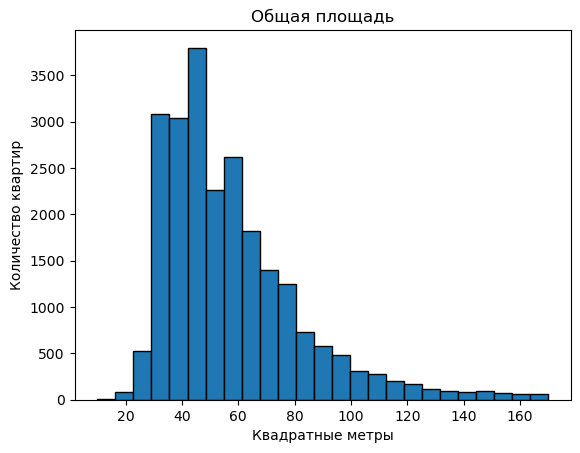

In [44]:
plt.hist(df['total_area'],bins=25, range=(10,170), edgecolor='black')
plt.title('Общая площадь')
plt.xlabel('Квадратные метры')
plt.ylabel('Количество квартир')

Исходя из диаграммы видно, что на рынке жилой недвижимости наиболее актуальны квартиры с площадью от 30 до 60 кв.м. С увеличением площади количество предложений стремится к минимуму.

**Построем гитсограмму жилой площади.**

Text(0, 0.5, 'Количество квартир')

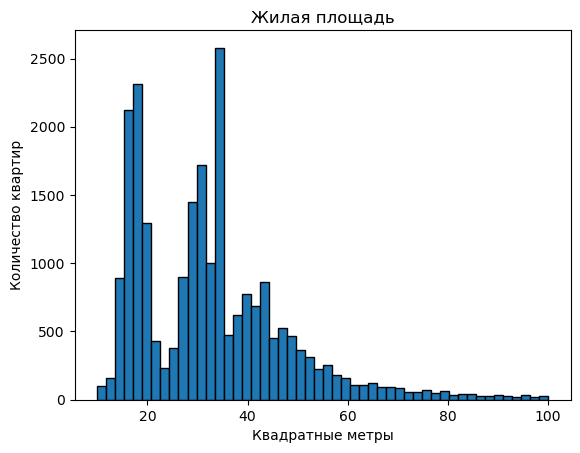

In [45]:
plt.hist(df['living_area'],bins=50,range=(10,100), edgecolor='black')
plt.title('Жилая площадь')
plt.xlabel('Квадратные метры')
plt.ylabel('Количество квартир')

Самые распространённые квартиры по жилой площади составлют от 15 до 20 кв.метров. Также представлено много квартир от 25 до 40 кв.м. Последущее увеличение жилой площади ведет к понижению предложения.

**Построем гитсограмму для площади кухни.**

Text(0, 0.5, 'Количество квартир')

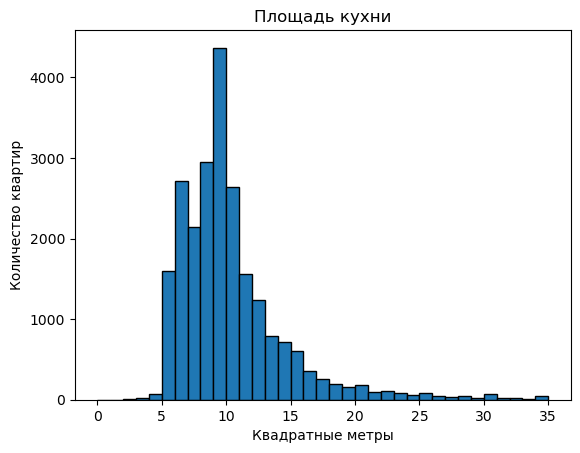

In [46]:
plt.hist(df['kitchen_area'],bins=35,range=(0,35), edgecolor='black')
plt.title('Площадь кухни')
plt.xlabel('Квадратные метры')
plt.ylabel('Количество квартир')

Наибольшее предложение квартир имеют площадь кухни от 5 до 15 кв.м.

**Построим гистограмму цены объекта.**

Text(0, 0.5, 'Количество квартир')

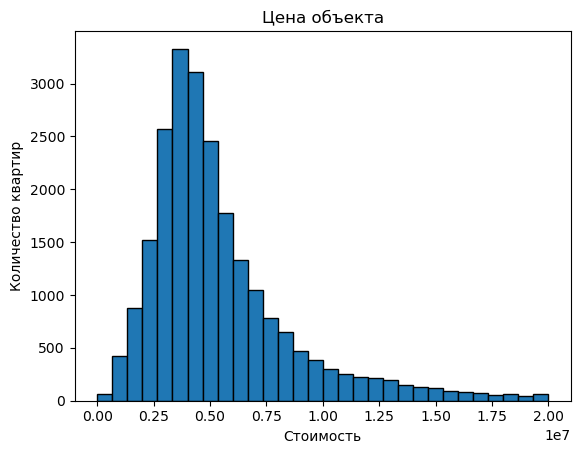

In [47]:
plt.hist(df['last_price'], bins=30, range=(0,20000000), edgecolor='black')
plt.title('Цена объекта')
plt.xlabel('Стоимость')
plt.ylabel('Количество квартир')

Больше всего квартир продается в районе 2,5-5 миллионов рублей.

**Построим гистограмму по количеству комнат в квартирах.**

Text(0, 0.5, 'Количество квартир')

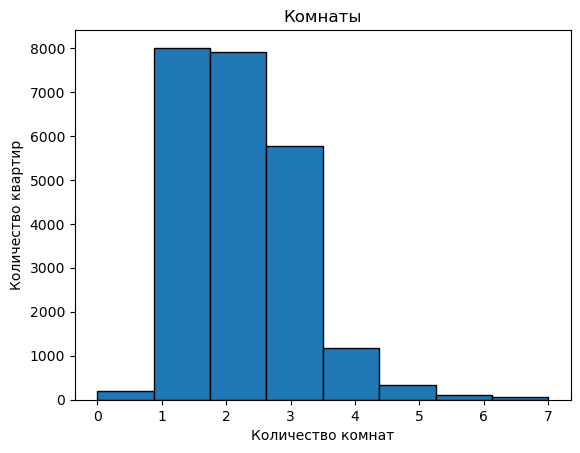

In [48]:
plt.hist(df['rooms'], bins=8, range=(0,7), edgecolor='black')
plt.title('Комнаты')
plt.xlabel('Количество комнат')
plt.ylabel('Количество квартир')

Больше всего предложений квартир в которых от 1 до 3 комнат. Студии и многокомнатные квартиры не особо актуальны.

**Построим диаграмму по этажу квартиры.**

Text(0, 0.5, 'Количество квартир')

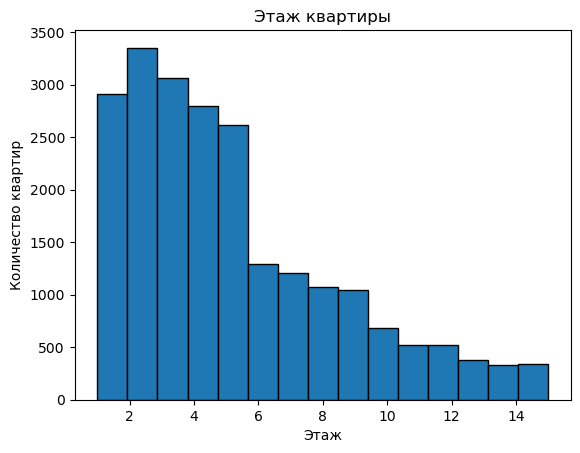

In [49]:
plt.hist(df['floor'], bins=15, range=(1,15), edgecolor='black')
plt.title('Этаж квартиры')
plt.xlabel('Этаж')
plt.ylabel('Количество квартир')

Больше всего предложений по квартирам расположенных на 1-10 этаже. 

**Построем гистограмму по кол-ву этажей в доме.**

Text(0, 0.5, 'Количество квартир')

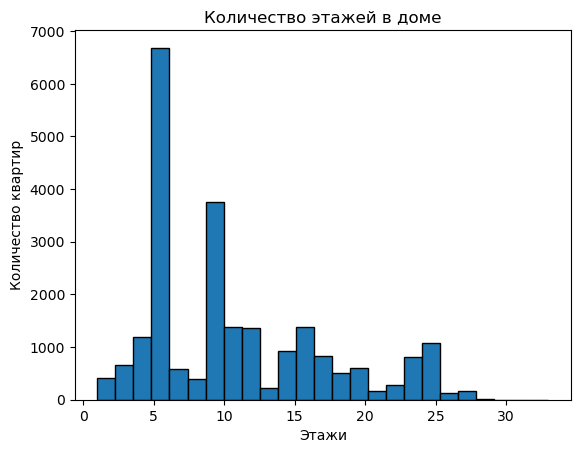

In [50]:
plt.hist(df['floors_total'], bins=25, range=(1,33), edgecolor='black')
plt.title('Количество этажей в доме')
plt.xlabel('Этажи')
plt.ylabel('Количество квартир')

Исходя из данных, можно сделать вывод, что в Санкт-Петербурге и области довольно мало многоэтажных домов. Больше всего пятиэтажек, количество которых почти 6 тыс.ед. Также выделяются многоквартирные дома в 10, 12, 16 и 25 этажей.

**Построем гистограмму по типу этажа квартиры.**

Text(0, 0.5, 'Количество квартир')

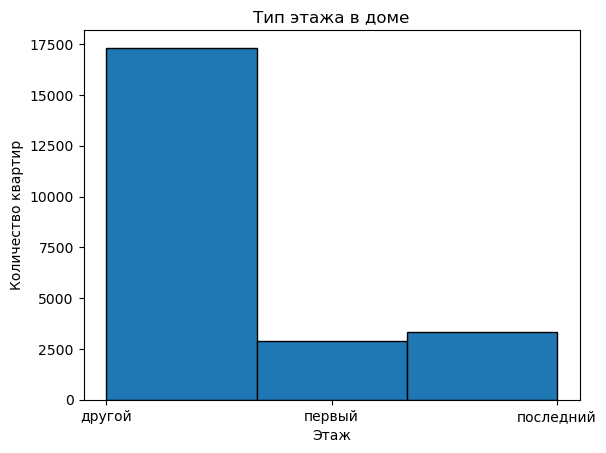

In [51]:
plt.hist(df['floors_group'], bins=3, edgecolor='black')
plt.title('Тип этажа в доме')
plt.xlabel('Этаж')
plt.ylabel('Количество квартир')

Меньше всего квартир на первом и последнем этаже,общее их количество примерно 5 тыс.ед., в то время как количество квартир расположенных на других этажах составляет 15 тысяч.

**Построем гистограмму расстояния до центра города.**

Text(0, 0.5, 'Количество кваритр')

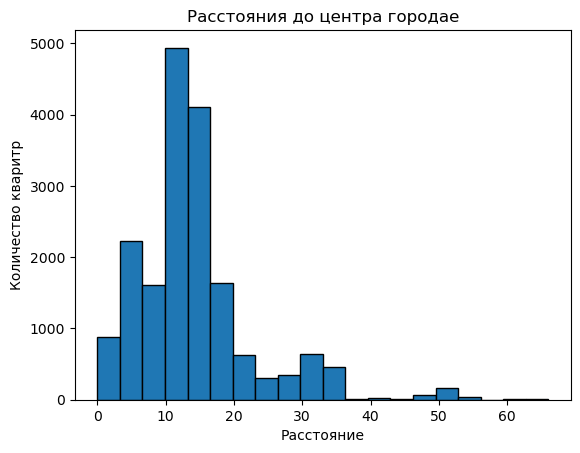

In [52]:
plt.hist(df['city_сenters_nearest_km'], bins=20, edgecolor='black')
plt.title('Расстояния до центра городае')
plt.xlabel('Расстояние')
plt.ylabel('Количество кваритр')

Больше всего квартир расстоянием до 20 км до центра.

**Построем гистограмму расстояния до ближайшего аэропорта.**

Text(0, 0.5, 'Количество квартр')

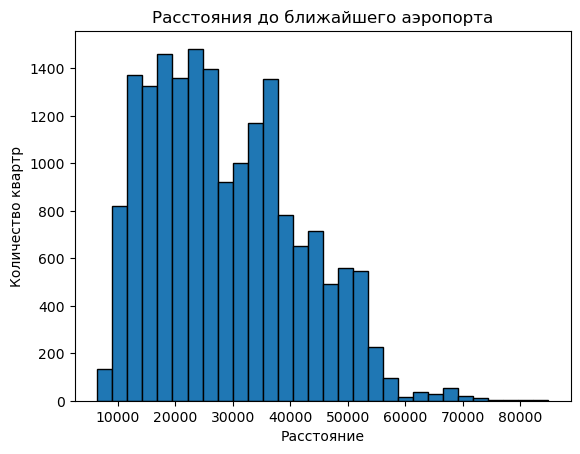

In [53]:
plt.hist(df['airports_nearest'], bins=30, edgecolor='black')
plt.title('Расстояния до ближайшего аэропорта')
plt.xlabel('Расстояние')
plt.ylabel('Количество квартр')

Больше всего квартир расположены на расстоянии от 15 до 40 км до ближайшего аэропорта.

**Построем гистограмму расстояния до ближайшего парка.**

Text(0, 0.5, 'Количество квартир')

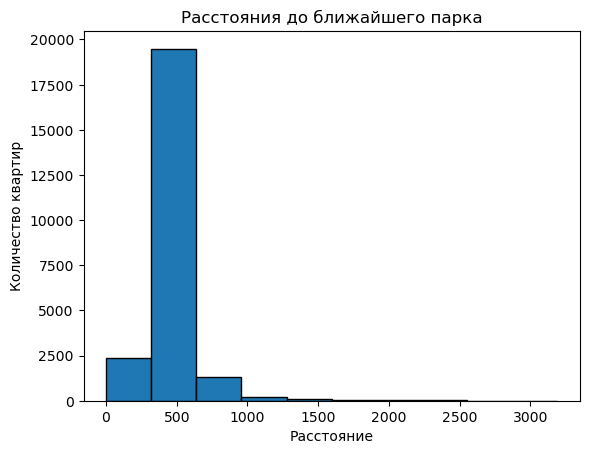

In [54]:
plt.hist(df['parks_nearest'],  edgecolor='black')
plt.title('Расстояния до ближайшего парка')
plt.xlabel('Расстояние')
plt.ylabel('Количество квартир')

Больше всего распространены квартиры расположенные в пределах 1 км до ближайшего парка.

**Построем гистограмму даты публикации объявления.**

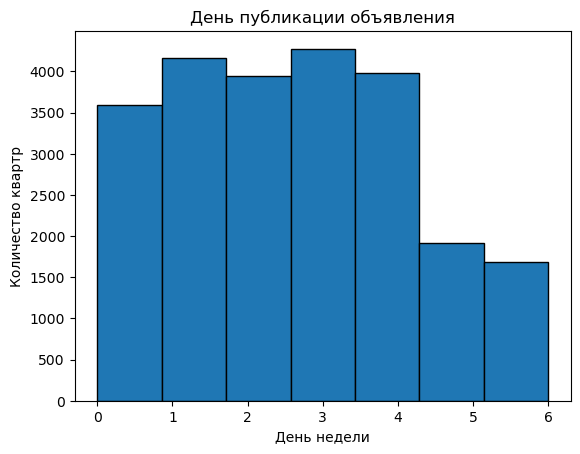

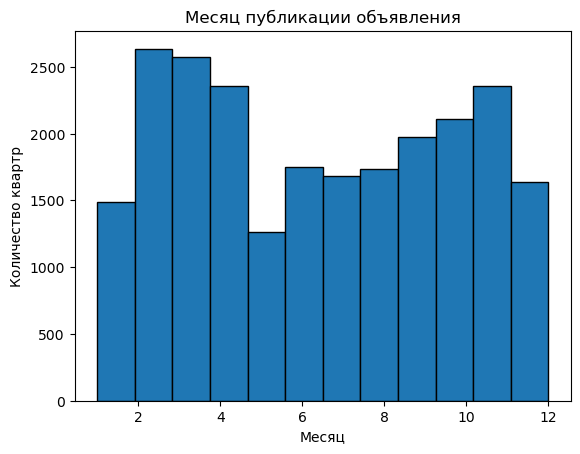

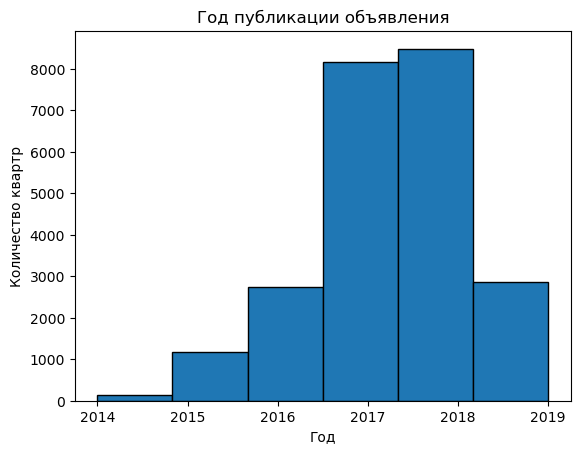

In [55]:
plt.hist(df['weekday_of_publicates'], bins=7, edgecolor='black')
plt.title('День публикации объявления')
plt.xlabel('День недели')
plt.ylabel('Количество квартр')
plt.show()


plt.hist(df['month_of_publicates'], bins=12, edgecolor='black')
plt.title('Месяц публикации объявления')
plt.xlabel('Месяц')
plt.ylabel('Количество квартр')
plt.show()

plt.hist(df['year_exposition'], bins=6, edgecolor='black')
plt.title('Год публикации объявления')
plt.xlabel('Год')
plt.ylabel('Количество квартр')
plt.show()


Чаще всего публикуют объявления о продажи квартир в рабочии дни. А самые популярные месяцы февраль, март, апрель. Наибольшее предложение квартир на рынке недвижимости было в 2018 и 2017 годую. В 2019 году данный показатель составил 2871 квартир, по сравнению с 2018 сократился в 2,9 раз. 

**Изучим, как быстро продавались квартиры.**

Диаграмма размаха времени продажи квартиры


Text(0, 0.5, 'Время продажи квартиры')

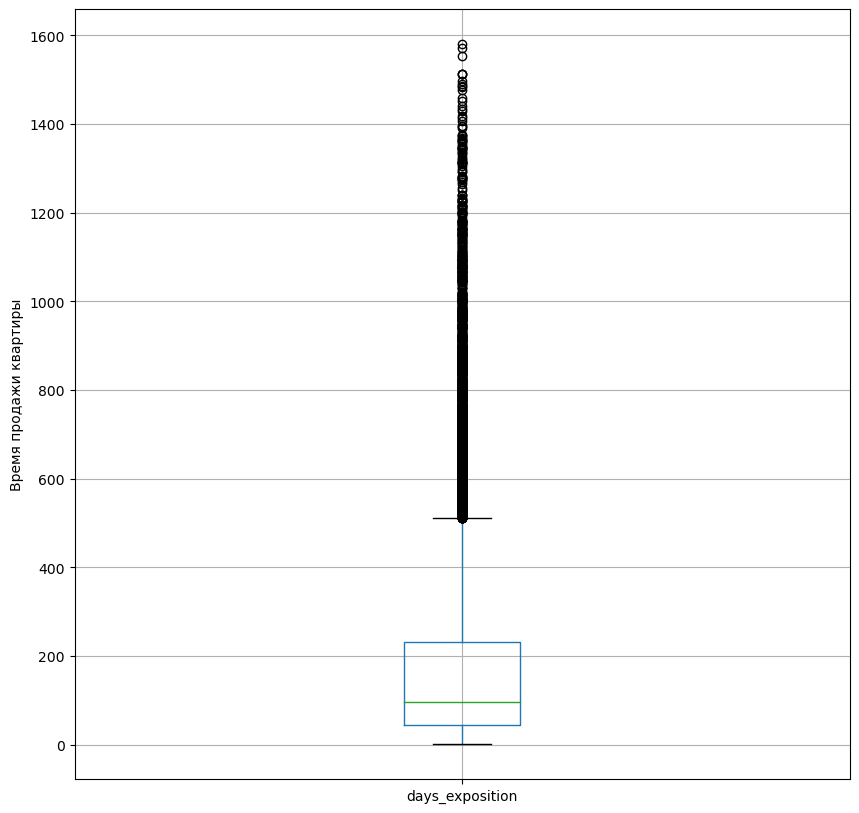

In [56]:
print('Диаграмма размаха времени продажи квартиры')
df.boxplot('days_exposition', figsize=(10,10))
plt.ylabel('Время продажи квартиры')

Нижний ус уперается в ноль это минимальное значение. Верхний заканчивается на значение около 460 это ориентировочно граница нормального размаха. Всё что лежит за ней считается выбросами. Такие значения лучше отсечь, так как сильно повлияют на рассчет среднего значения срока продажи квартир. 

In [57]:
new_df = df.query('days_exposition < 460')

Text(0, 0.5, 'Количество объявлений')

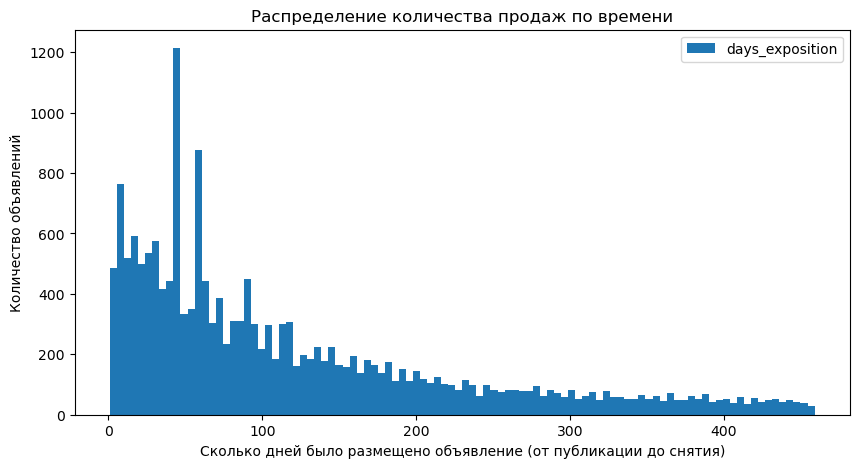

In [58]:
new_df.plot(
    kind='hist',
    y='days_exposition',
    title='Распределение количества продаж по времени', 
    bins=100, 
    figsize=(10,5)
)

plt.xlabel('Сколько дней было размещено объявление (от публикации до снятия)')
plt.ylabel('Количество объявлений')

In [59]:
new_df['days_exposition'].agg(['mean','median'])

mean      121.196034
median     82.000000
Name: days_exposition, dtype: float64

Вывод: в среднем продажа квартир занимет около 3-ёх месяцев. Исходя из  дипграммы указанной выше, также есть квартиры, которые продавались в течение дня. Поэтому можно сказать, что продажи осуществившиеся в течение 45 дней быстрые, более 200 дней необычно долгими.

**Узнаем какие факторы больше всего вляют на стоимость квартиры.**

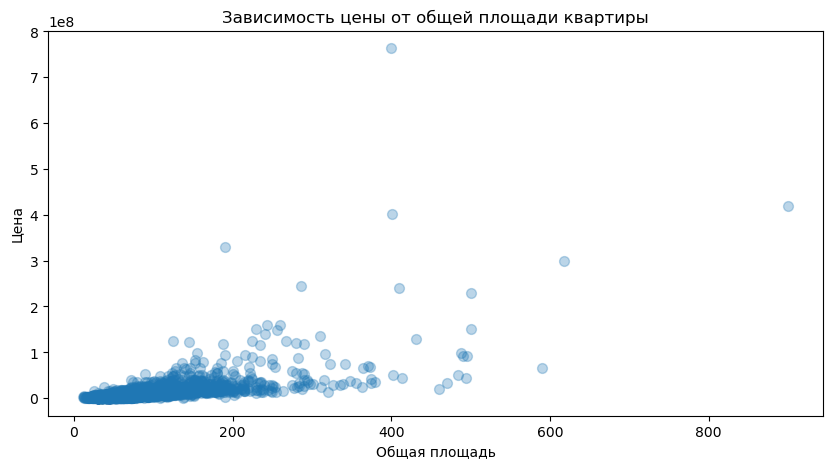

0.6264415334861452


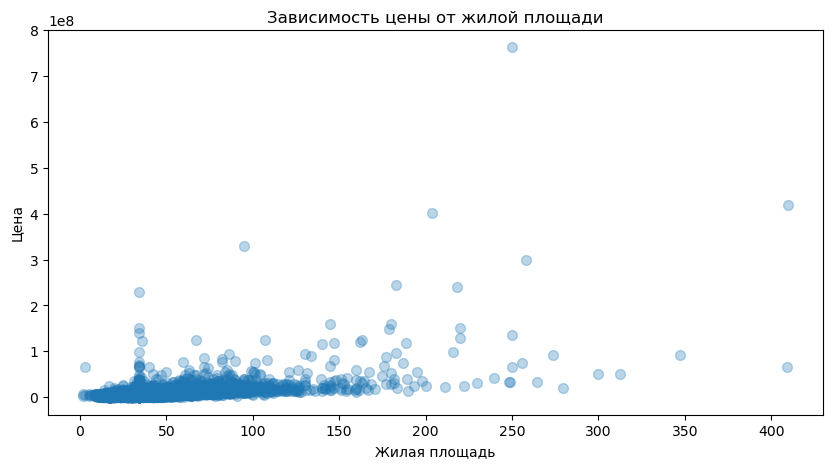

0.5198717044047603


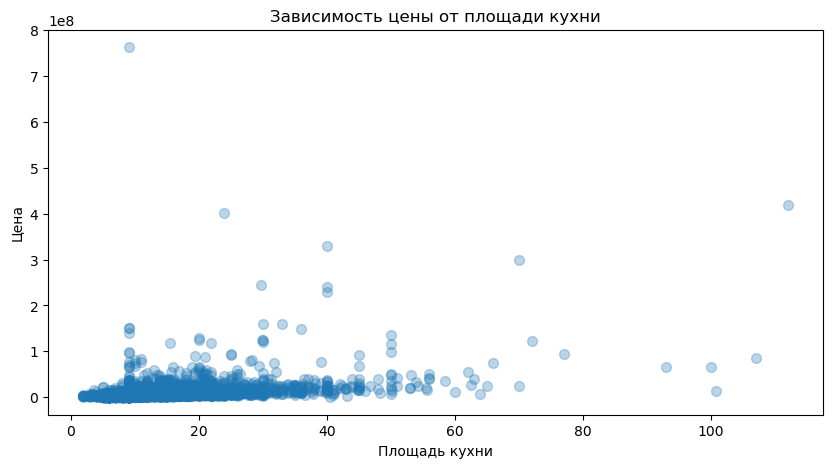

0.4052666571697049


In [60]:
new_df.plot.scatter(x='total_area', y='last_price', s=50, figsize=(10,5), alpha=0.3)
plt.title('Зависимость цены от общей площади квартиры')
plt.xlabel('Общая площадь')
plt.ylabel('Цена')
plt.show()
print(new_df['total_area'].corr(new_df['last_price']))

new_df.plot.scatter(x='living_area', y='last_price', s=50, figsize=(10,5), alpha=0.3)
plt.title('Зависимость цены от жилой площади')
plt.xlabel('Жилая площадь')
plt.ylabel('Цена')
plt.show()
print(new_df['living_area'].corr(new_df['last_price']))

new_df.plot.scatter(x='kitchen_area', y='last_price', s=50, figsize=(10,5), alpha=0.3)
plt.title('Зависимость цены от площади кухни')
plt.xlabel('Площадь кухни')
plt.ylabel('Цена')
plt.show()
print(new_df['kitchen_area'].corr(new_df['last_price']))

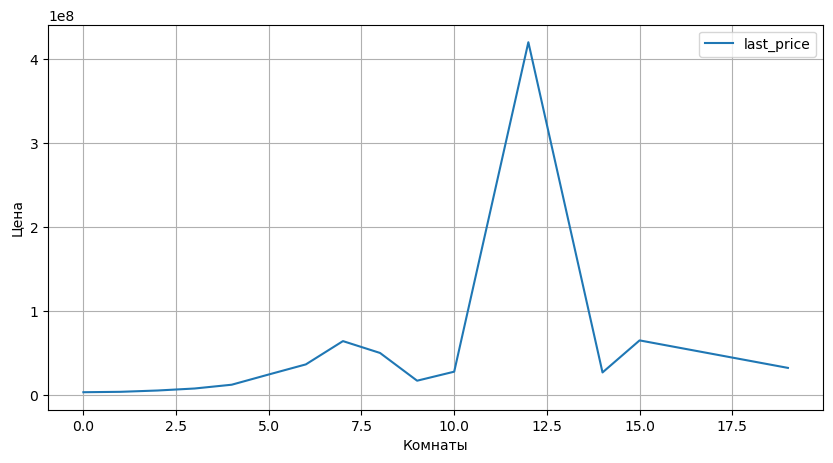

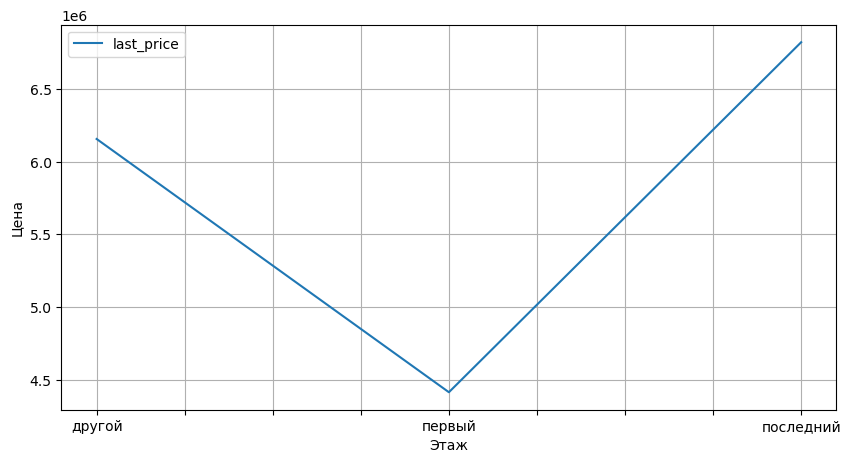

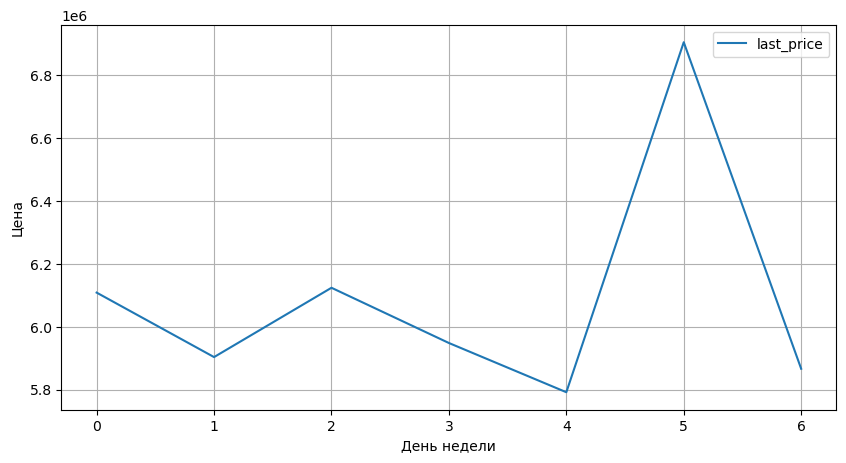

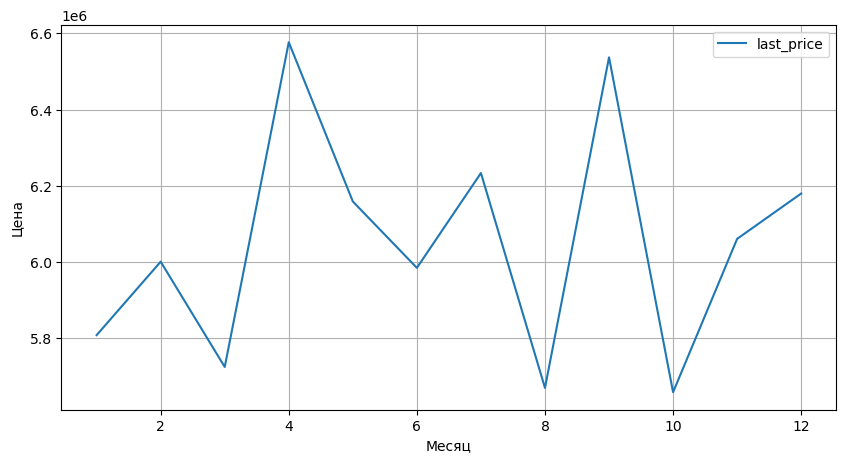

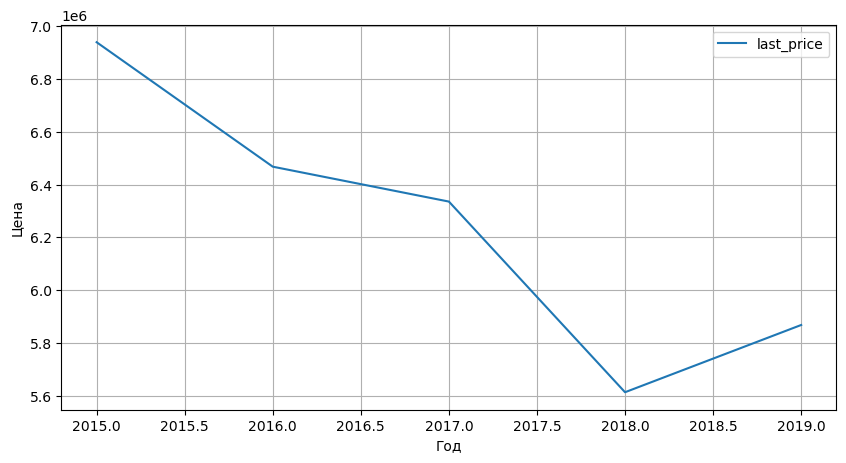

In [61]:
new_df.pivot_table(
    index='rooms', 
    values='last_price', 
    ).plot(grid=True, figsize=(10,5))
plt.xlabel('Комнаты')
plt.ylabel('Цена')
plt.show()

new_df.pivot_table(
    index='floors_group', 
    values='last_price', 
    ).plot(grid=True, figsize=(10,5))
plt.xlabel('Этаж')
plt.ylabel('Цена')
plt.show()

new_df.pivot_table(
    index='weekday_of_publicates', 
    values='last_price', 
    ).plot(grid=True, figsize=(10,5))
plt.xlabel('День недели')
plt.ylabel('Цена')
plt.show()

new_df.pivot_table(
    index='month_of_publicates', 
    values='last_price', 
    ).plot(grid=True, figsize=(10,5))
plt.xlabel('Месяц')
plt.ylabel('Цена')
plt.show()

new_df.pivot_table(
    index='year_exposition', 
    values='last_price', 
    ).plot(grid=True, figsize=(10,5))
plt.xlabel('Год')
plt.ylabel('Цена')
plt.show()

Исходя из графиков представленных выше можно сделать следущие выводы:
 1. С увлеичение общей площади тренд стремится к повышению стоимоти, но есть квартиры которые выбиваются из общего граффика. Такая тенденция заметна и по отношению к площади кухни, и по отношению к жилой площади.
 4. Большую стоимость имеют квартиры с 12 комнатами. 
 5. Квартиры на первом этаже продаются дешевле всего их стоимость составлет 4,4 миллиона рублей. Объекты расположенные на последнем этаже оцениваются в размере 6,2 миллионов рублей. Самые дорогие квартиры расположенные на других этажах их стоимость составляет 6,8 миллионов рублей.
 6. Дороже всего объявления размещенные в пятницу их стоимость составляет более 6,8 миллионов рублей.
 7. Дороже всего объявления размещенные в апреле и в сентябре их стоимость составляет около 6,5 миллионов рублей.
 8. За рассматриваемый период с 2015 по 2018 год стоимость квартир упала с 7 миилионов до 5,6 миллионов. И только начиная с 2018 года мы наблюдаем восходящий тренд.
 9. Цена больше всего зависит от общей площади, где корреляция равна 0,62.

**Посчитаем среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений.**

In [62]:
df_ten_locality_name = df.pivot_table(
    index='locality_name',
    values=['first_day_exposition'],
    aggfunc='count'
).sort_values(by='first_day_exposition', ascending=False).head(10)
df_ten_locality_name = df_ten_locality_name.rename(columns={'first_day_exposition': 'Кол-во квартир'})
df_ten_locality_name.index.name = 'Населённый пункт'
display(df_ten_locality_name)

,Кол-во квартир
Населённый пункт,
санкт-петербург,15651
посёлок мурино,552
посёлок шушары,439
всеволожск,398
пушкин,369
колпино,338
посёлок парголово,327
гатчина,307
деревня кудрово,299


Первое место по количеству квартир занимает культурная столица России. Остальные населённые пункты находятся в Питерской области.

In [63]:
df_ten_locality_name['cost_per_square_meter'] = df.pivot_table(
    index='locality_name',
    values='cost_per_square_meter'
).astype('int')
df_ten_locality_name =df_ten_locality_name.rename(columns={'cost_per_square_meter':'Цена за кв.метр'})
display(df_ten_locality_name)
display(df_ten_locality_name.min())

,Кол-во квартир,Цена за кв.метр
Населённый пункт,,
санкт-петербург,15651,114868
посёлок мурино,552,85629
посёлок шушары,439,78550
всеволожск,398,68654
пушкин,369,103125
колпино,338,75424
посёлок парголово,327,90175
гатчина,307,68745
деревня кудрово,299,92473


Кол-во квартир       237
Цена за кв.метр    58141
dtype: int64

Самые высокая цена за квадратный метр в Питере она составляет 114 868 рубл., самая низкая в Выборге 58 141 рубл.

**Зависимость цены объекта от расстояния до центра.**

In [64]:
spb_df = new_df.loc[new_df['locality_name'] == 'санкт-петербург']

<AxesSubplot:>

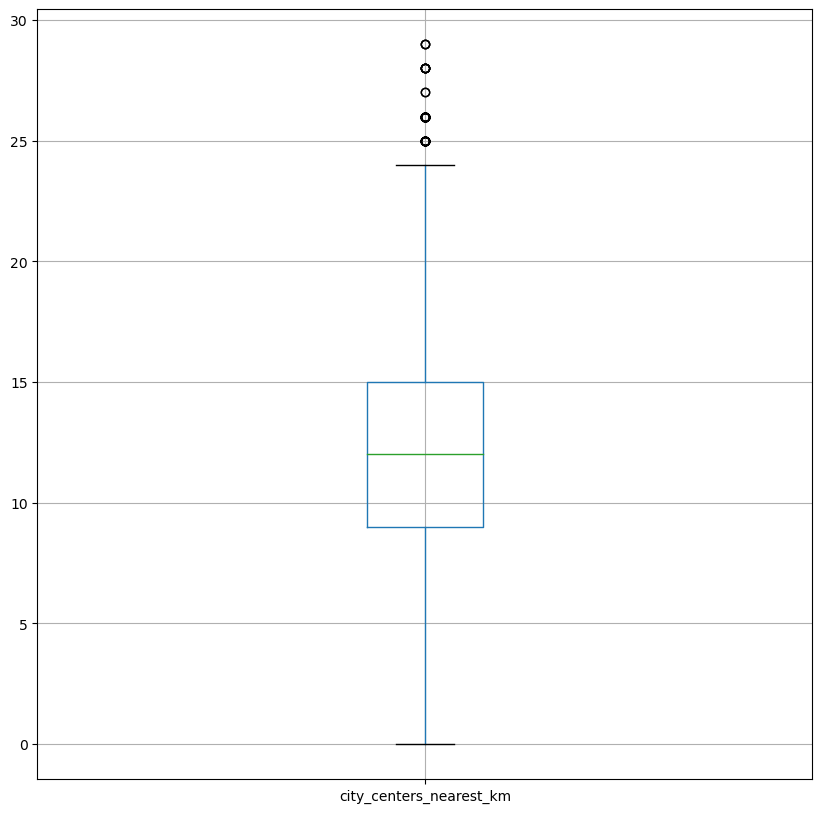

In [65]:
spb_df.boxplot('city_сenters_nearest_km', figsize=(10,10))

In [66]:
spb_df = spb_df.loc[spb_df['city_сenters_nearest_km'] < 24]

In [67]:
cost_one_km = spb_df['last_price'].sum()/spb_df['city_сenters_nearest_km'].sum()
print(cost_one_km.astype('int'))

627236


Text(0, 0.5, 'Цена')

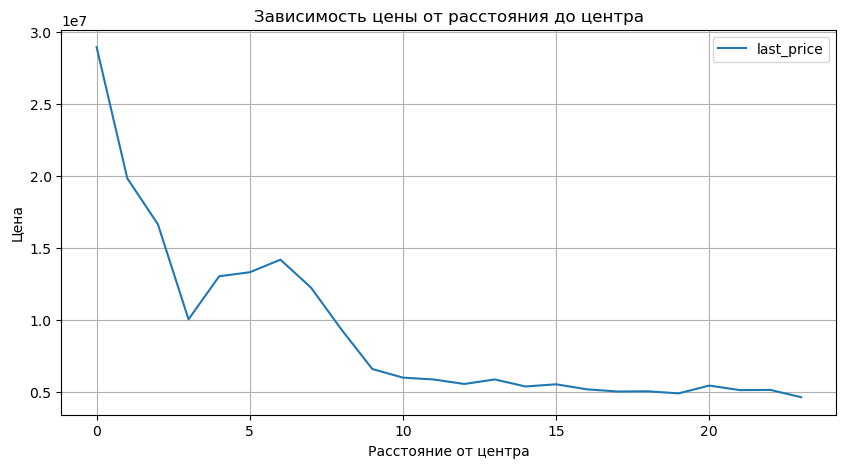

In [68]:
spb_df.pivot_table(
    index='city_сenters_nearest_km', 
    values='last_price' 
    ).plot(grid=True, figsize=(10,5))
plt.title('Зависимость цены от расстояния до центра')
plt.xlabel('Расстояние от центра')
plt.ylabel('Цена')

Таким образом стоимость одного км в питере обходится в 627 тыс.руб. Исходя из граффика видно, чем дальше расположена квартира от центра тем ниже её стоимость. 

# Общий вывод<a id='5-section'></a>

Исходя из проделанного исследования о предложении квартир в Санкт-Петербурге и Ленинградской области можно сделать следущие выводы:
 1. Срок продажи:
     Чаще всего квартиру проадают за 3-4 месяца. Также есть большое число квартир которые продавались всего за несколько дней после размещения объявления. Есть и такие квартиры которые продавались более года.
 2. Факторы влияющие на стоимость квартиры:
    На стоимость квартиры влияет этаж на котором она расположена. Так квартиры на первом этаже намного дешевле чем остальные. Также квартиры на последнем этаже дешевле чем на других, кроме первого. Стоимость квартиры в большей степени зависит от площади нежели чем от количества комнат.
 3. Изучив топ 10 населенных пунктов по стоимости можно выделить Санкт-Петербург, как самый дорогой населёный пункт стоимости за кв.м. составляет 114 868, самая низкая в Выборге 58 141 рубл.
 4. Зависимость цены объекта до центра:
    Стоимость квартир в пределах до 10 км до центра города почти не отличаются от стоимости, но есть данные которые выбиваются от общего граффика. 